# < 빅데이터분석 2021 기말 실기 고사 >
# 박현수, 201858036 빅데이터분석 (B)

In [215]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.decomposition import PCA

## [A] 오늘의 기상 관측치들(c1~c15)로부터 다음날 비가 오는지(rain)를 예측하는 분석을 하고자 한다. 다음 순서대로 필요한 코드를 작성하고 질문에 답하시오. (5점*7문제=35점)

### 1) 'FinalA.txt' 파일을 읽어 DataFrame 객체를 생성하여 처음 5행을 출력하고, 샘플의 개수를 구하시오

In [216]:
df = pd.read_csv("FinalA.txt", sep=" ")

In [217]:
df.head(5)

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,rain
1,8.0,24.3,3.4,6.3,30,6,20,68,29,1019.7,1015.0,7,7,14.4,23.6,Yes
2,14.0,26.9,4.4,9.7,39,4,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes
3,13.7,23.4,5.8,3.3,85,6,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes
4,13.3,15.5,7.2,9.1,54,30,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes
5,7.6,16.1,5.6,10.6,50,20,28,68,49,1018.3,1018.5,7,7,11.1,15.4,No


In [218]:
len(df)

328

### 2) 특성 행렬과 레이블 벡터(단, 'Yes'는 1, 'No'는 0으로 코딩)를 생성하시오

In [219]:
X = df.drop('rain', axis=1).to_numpy()
label = df['rain'].to_numpy()
y = np.where(label=='no', 0, 1)

### 3) 각 특성의 평균과 레이블의 분포(값별 빈도수)를 구한 후, 데이터 표준화와 데이터 분할 시 층화추출(stratify)이 필요한 이유를 설명하시오.

In [220]:
df.describe()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,7.742988,20.897561,4.702439,8.014939,40.396341,10.414634,18.185976,71.100610,44.003049,1019.350000,1016.530793,3.905488,4.000000,12.815549,19.556402
std,5.945199,6.707310,2.681183,3.506646,13.132176,7.811544,8.926759,12.983367,16.605975,6.715244,6.469774,2.974957,2.652101,5.542521,6.644311
min,-5.300000,7.600000,0.200000,0.000000,13.000000,2.000000,4.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000
25%,2.850000,15.500000,2.550000,6.000000,31.000000,6.000000,11.000000,63.000000,32.000000,1014.800000,1012.400000,1.000000,1.000000,8.175000,14.500000
50%,7.900000,20.400000,4.400000,8.750000,39.000000,7.000000,17.000000,71.000000,42.500000,1019.750000,1016.900000,4.000000,4.000000,13.500000,18.850000
75%,12.800000,25.800000,6.600000,10.700000,46.000000,13.000000,24.000000,80.000000,54.000000,1024.300000,1021.125000,7.000000,7.000000,17.200000,24.225000
max,20.900000,35.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,93.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000


* stratify는 지정한 데이터의 비율을 유지하기 위해 존재해야 한다. 나누어진 데이터 셋들도 0과 1의 비율을 유지한채 분할된다.

### 4) 데이터를 8:2로 훈련용과 테스트용으로 분할하고(단, stratify=y, random_state=0) 표준화하시오.

In [221]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=0, stratify=y
)

In [222]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### 5) 로지스틱회귀(디폴트모형)를 실시하여 테스트 데이터에 대한 정확도와 정오분류표를 출력하고 'Yes' 클래스의 정밀도와 재현율을 구하시오.

In [223]:
logistic = LogisticRegression()
logistic.fit(X_train_std, y_train)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [224]:
y_pred = logistic(X_test_std)

TypeError: 'LogisticRegression' object is not callable

In [230]:
precision_score(y_test, y_pred)

NameError: name 'y_pred' is not defined

In [231]:
recall_score(y_test, y_pred)

NameError: name 'y_pred' is not defined

### 6) max_depth 값을 1부터 10까지 변화시키면서 교차검증(cv=5)을 통하여 최적 max_depth를 구하여, 이 값을 사용하는 결정트리에 사용되는 특성들의 이름을 구하시오.

In [233]:
param = {'max_depth': range(1, 11)}
gscv = GridSearchCV( 
    estimator=DecisionTreeClassifier(random_state=0), 
    param_grid=param, scoring='accuracy', cv=5, n_jobs=-1)
gscv.fit(X_train, y_train)
print(gscv.best_params_)

{'max_depth': 1}


### 7) 은닉층이 한 개(유닛 개수=16)인 MLP 신경망을 구축하고 에포크수를 10, 배치사이즈를 2로 하여 훈련시킨 후, 테스트셋의 정확도를 구하시오.

## [B] 날짜와 기후 특성을 사용하여 자전거 공유시스템 사용 건수(cnt)를 예측하는 분석을 하고자 한다. 다음 순서대로 필요한 코드를 작성하고 질문에 답하시오. (5점*4문제=20점)


### 1) 'FinalB.txt' 파일을 읽어 DataFrame을 생성한 후, 숫자로 인코딩된 범주형 칼럼의 타입을 예와 같이 변경하여 info() 메서드 결과를 출력하시오. [예] df['season'] = df['season'].astype(str)

In [225]:
df2 = pd.read_csv("FinalB.csv")

In [226]:
df2['season'] = df2['season'].astype(str)
df2['weekday'] = df2['weekday'].astype(str)
df2['weathersit'] = df2['weathersit'].astype(str)

In [227]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   weekday     17379 non-null  object 
 2   weathersit  17379 non-null  object 
 3   temp        17379 non-null  float64
 4   hum         17379 non-null  float64
 5   windspeed   17379 non-null  float64
 6   cnt         17379 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 950.5+ KB


### 2) season 칼럼과 cnt 칼럼에 대하여 아래와 같은 그래프를 작성하시오.

Text(0.5, 0, 'cnt')

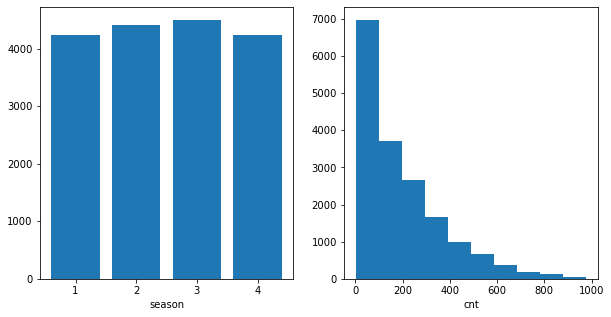

In [228]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
season = df2.groupby('season')['season'].count()
plt.bar( season.index, season.values)
plt.xlabel("season")

plt.subplot(1, 2, 2)
plt.hist(df2["cnt"])
plt.xlabel('cnt')

### 3) temp, hum, windspeed를 특성으로 하여 cnt를 설명하는 선형회귀를 실시하고 결정계수를 구하시오. (답:0.25)

In [247]:
X = df2.loc[[3, 4, 5]].to_numpy()
X = X[:, np.newaxis]
y = df2['cnt'].to_numpy

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=0)

TypeError: Singleton array array(<bound method IndexOpsMixin.to_numpy of 0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt, Length: 17379, dtype: int64>, dtype=object) cannot be considered a valid collection.

In [248]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [251]:
lr.score(X_train, y_train)

1.0

### 4) 모든 특성들을 사용하여(범주형 특성들은 원핫인코딩) cnt를 설명하는 선형회귀를 실시하고 결정계수를 구하시오. (답:0.28)

In [252]:
X = df2.iloc[:].to_numpy()
y = df2['cnt'].to_numpy

In [253]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=0)

TypeError: Singleton array array(<bound method IndexOpsMixin.to_numpy of 0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt, Length: 17379, dtype: int64>, dtype=object) cannot be considered a valid collection.

In [254]:
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

LinearRegression()